<a href="https://colab.research.google.com/github/YashGabale/IT7103/blob/main/IT7103_Assignemt2_YashGabale_ygabale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**IT7103 PRACTICAL DATA ANALYTICS
SUMMER 2024**

**Name:** Yash Gabale (ygabale)

# **1. Loading Data intoDataframe**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto-mpg.csv')
data

Mounted at /content/drive


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [2]:
data.shape   #Shape of Data frame

(398, 9)

In [3]:
data.info()   #Datatype of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [25]:
data.isnull().sum() # checking null values in columns in dataframe

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Thier are 6 Values missing in Horsepower So we need to fix this.

In [26]:
# Missing Values we are using Handiling missing values
data['horsepower']=pd.to_numeric(data['horsepower'])
data['horsepower'].fillna(data['horsepower'].mean(),inplace=True)

data.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

# **2.	Split the data 75% training and 25% testing**

In [27]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(data,test_size=0.25)   #data is splited into 75% and 25% testing
train.shape,test.shape

((298, 9), (100, 9))

In [5]:
train.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,298.000000,298.000000,298.000000,293.000000,298.000000,298.000000,298.000000,298.000000
mean,23.374832,5.453020,194.159396,104.696246,2979.520134,15.681879,75.942953,1.540268
std,7.628981,1.697535,106.073932,38.936371,848.048126,2.872277,3.690934,0.782848
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,98.500000,77.000000,2229.500000,13.850000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,92.000000,2824.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,260.000000,125.000000,3612.000000,17.400000,79.000000,2.000000
max,44.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# **3.Visualize necessary columns in the data.**

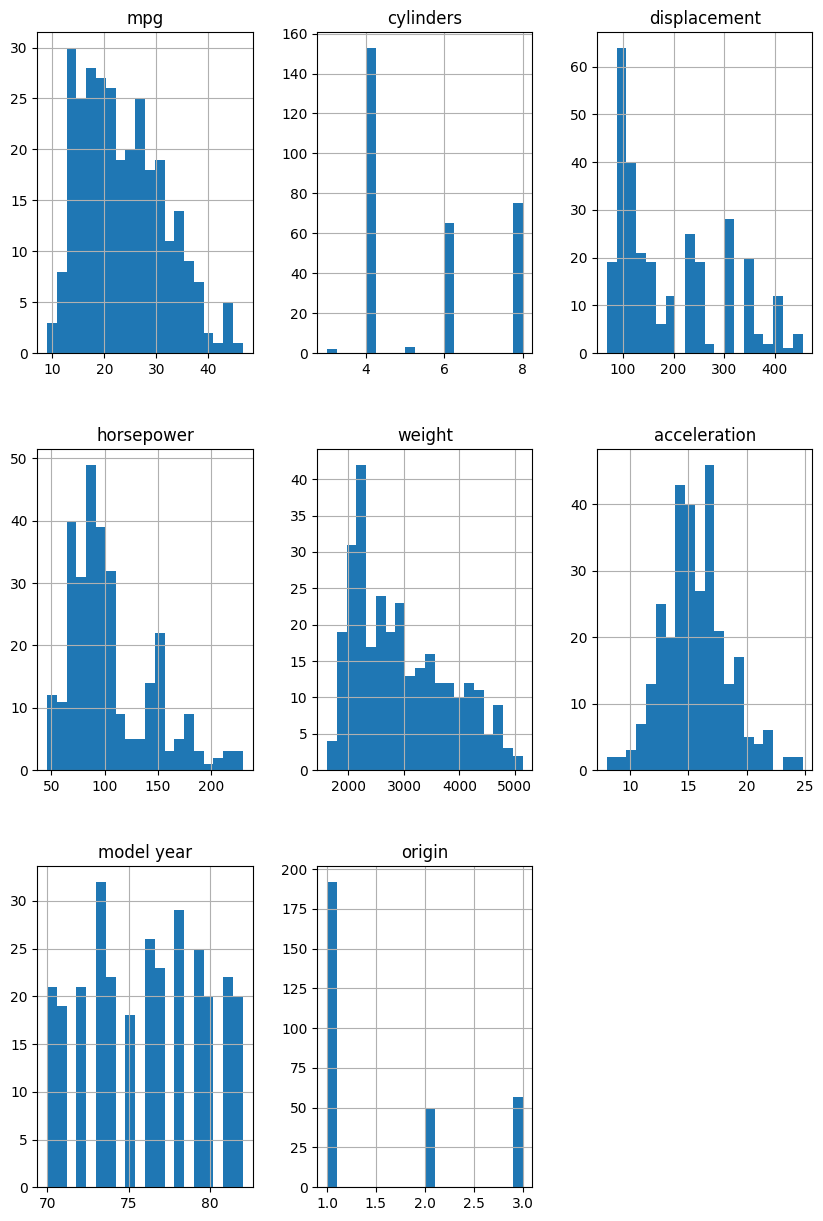

In [28]:
from matplotlib import pyplot as plt
train.hist(bins=20,figsize=(10,15))
plt.show()

In [7]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


**Numeric Columns**

In [29]:
num_cols = [column for column in data.columns if (train[column].dtypes == np.int64) or (train[column].dtypes == np.float64)]
num_cols.remove('model year')
num_cols.remove('origin')
num_cols.remove('cylinders')
num_cols

['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

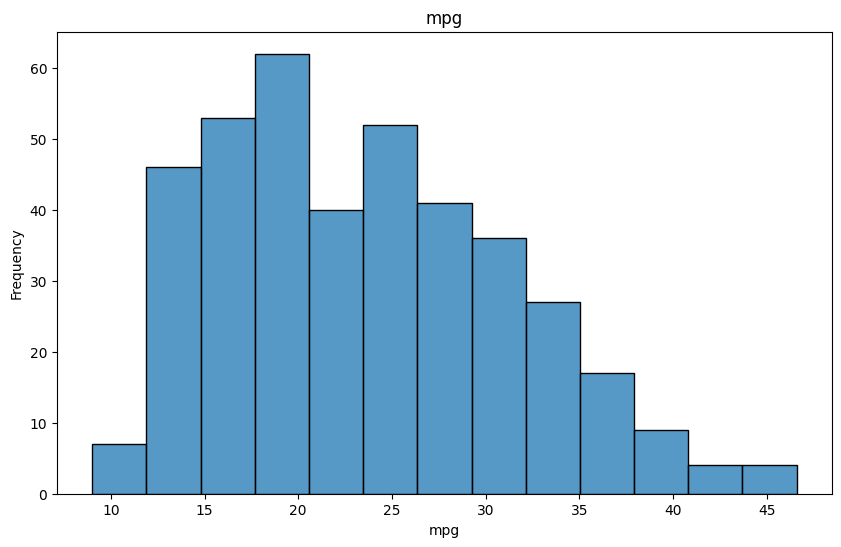

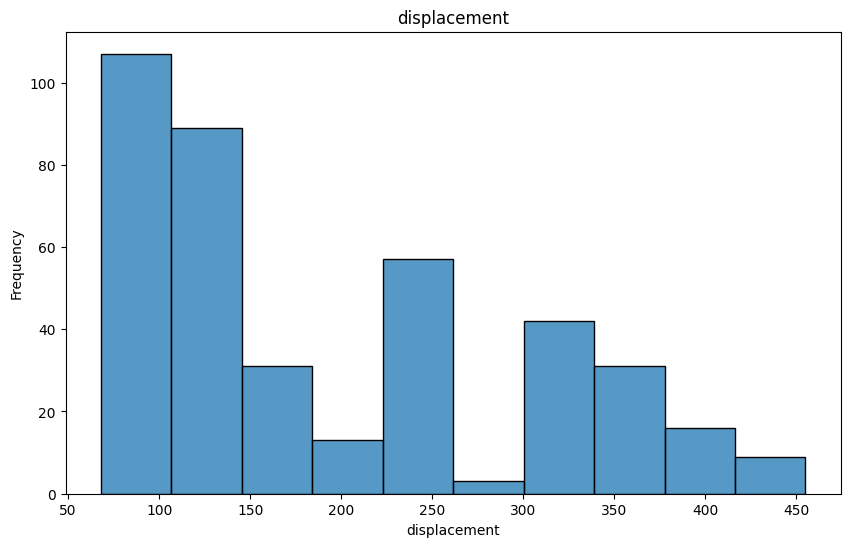

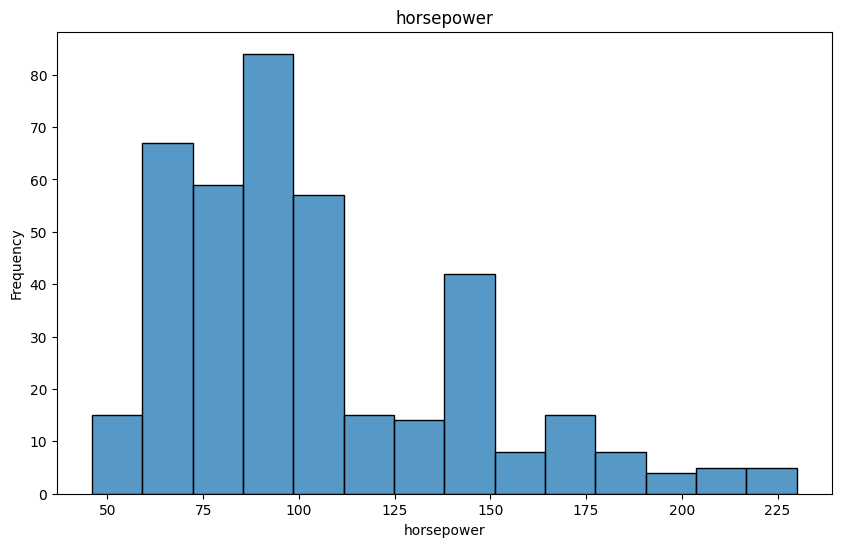

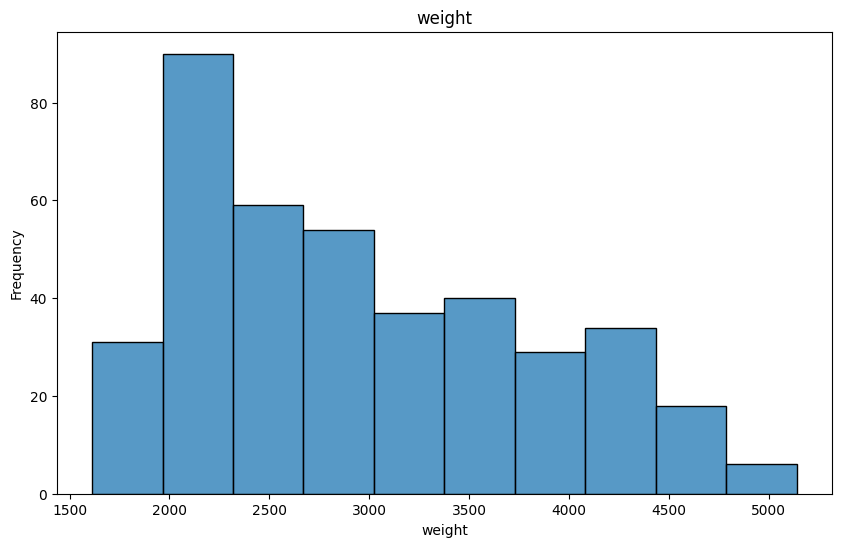

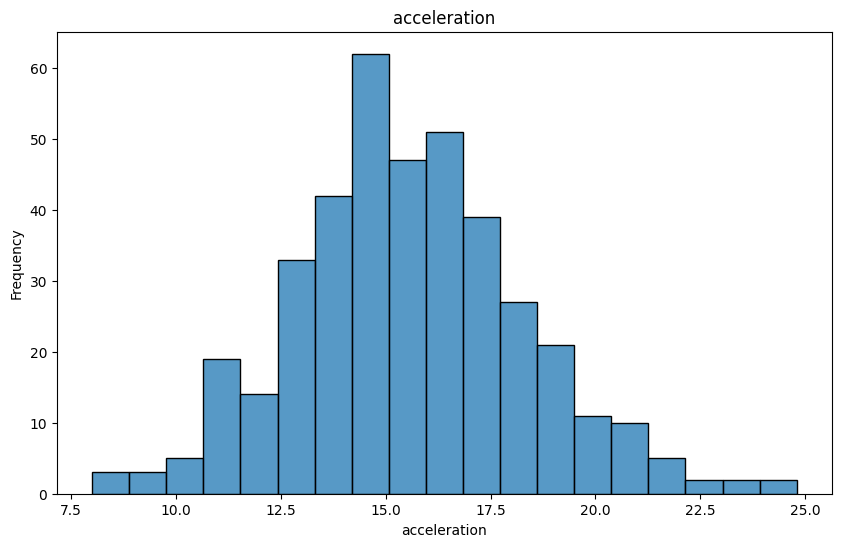

In [33]:
import seaborn as sn
import matplotlib.pyplot as plt
def num_dis(data):
    for col in num_cols:
        plt.figure(figsize=(10,6))
        sn.histplot(data[col])
        plt.title(f'{col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

num_dis(data)

**Skewness**

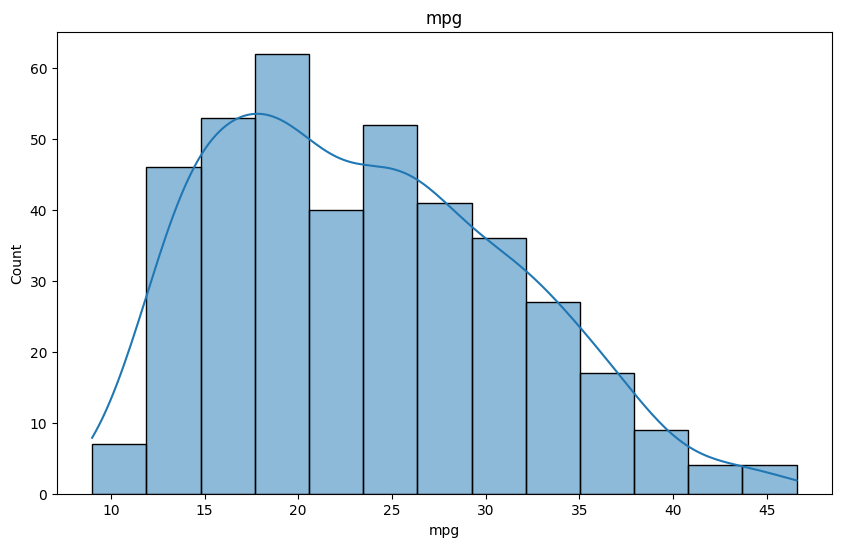

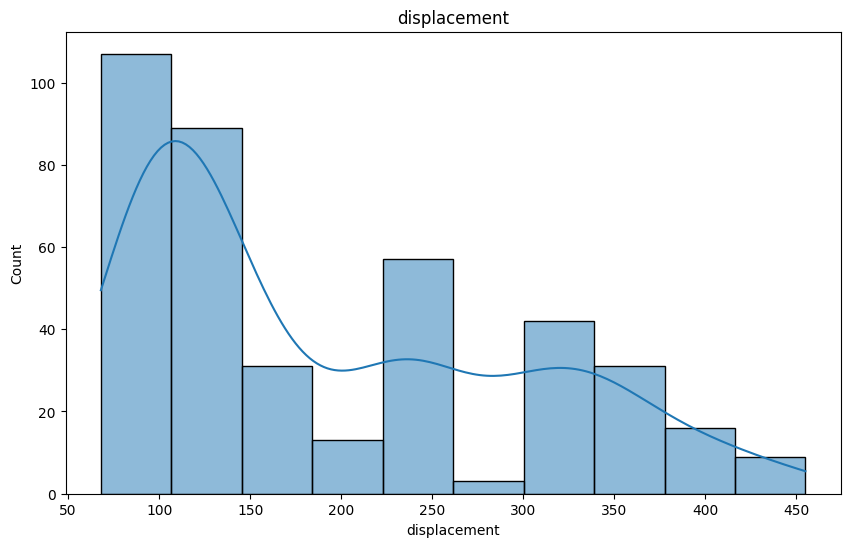

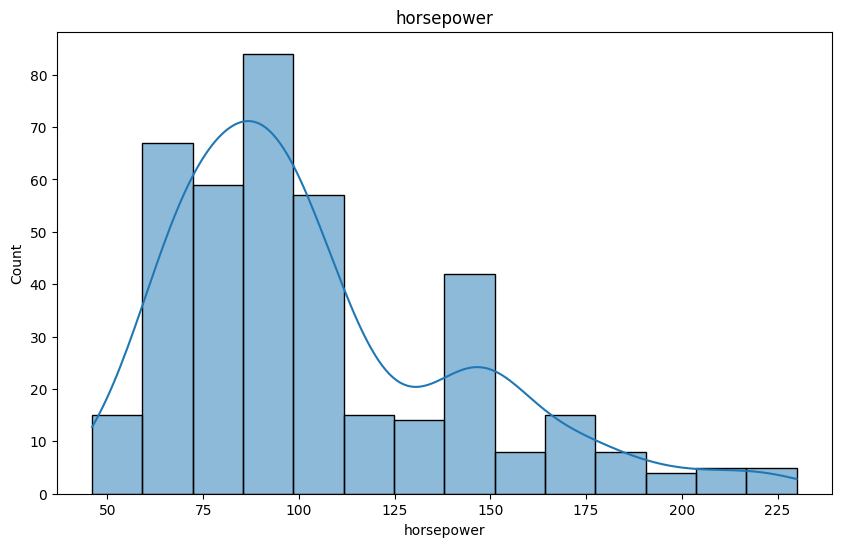

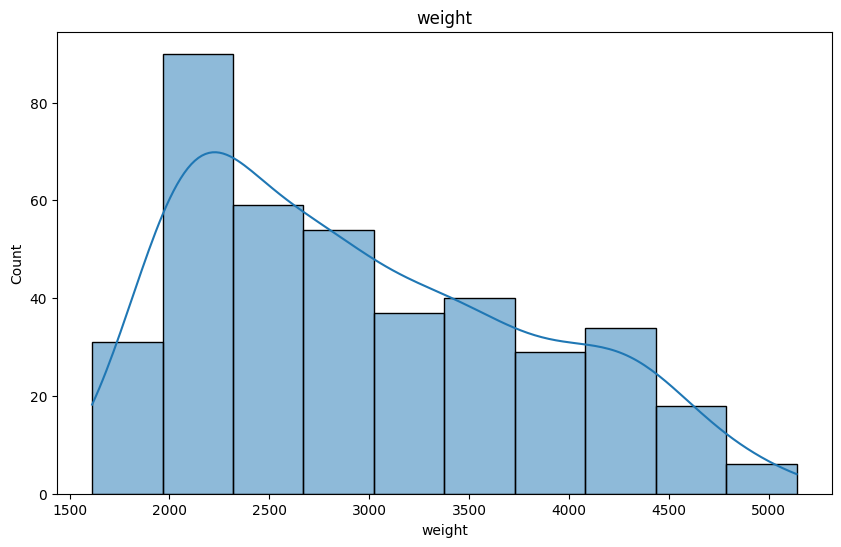

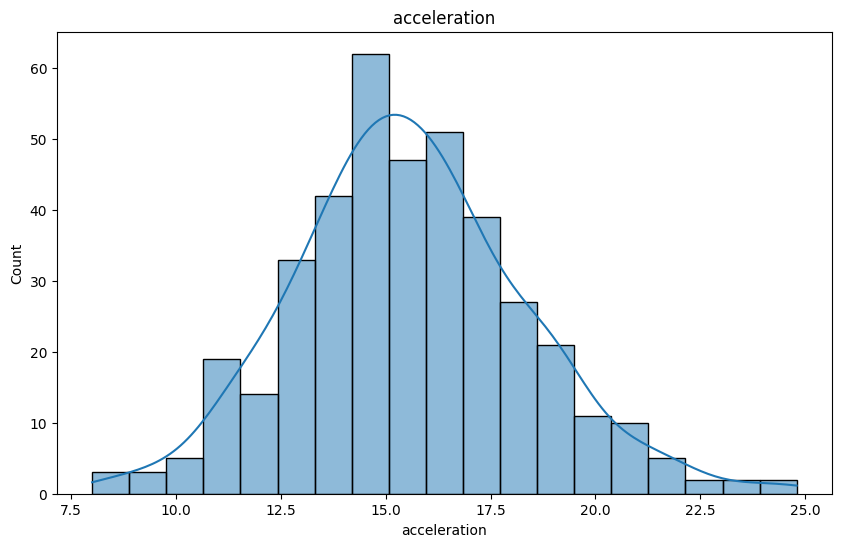

In [31]:

for column in num_cols:
    plt.figure(figsize=(10,6))
    sn.histplot(data[column],kde=True)
    plt.title(column)
    plt.show()


In [34]:
skewness=data[num_cols].skew()
print(skewness)

mpg             0.457066
displacement    0.719645
horsepower      1.095552
weight          0.531063
acceleration    0.278777
dtype: float64


**List of the columns**

In [35]:
sym_cols=['mpg','weight','displacement','acceleration']
skew_cols=['horsepower']
cat_cols=['car name','model year','origin','cylinders']

#  **4.	Building a pipeline**

In [41]:
from sklearn.preprocessing import OneHotEncoder,FunctionTransformer,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])  # Imputation  Standardization

def log_transform(x):
    return np.log(x+0.1)

log_pipeline=Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
    ('log transform', FunctionTransformer(log_transform)),
    ('standardize', StandardScaler())
])  # Imputation  Log transformation  Standardization

cat_pipeline=Pipeline([
     ('imputer',SimpleImputer(strategy='constant')),
     ('onehot',OneHotEncoder(handle_unknown='infrequent_if_exist'))
 ])  # One hot encoder
processing_pipeline=ColumnTransformer([
    ('num_skewwed',num_pipeline,sym_cols),
    ('log',log_pipeline,skew_cols),
    ('cat',cat_pipeline,cat_cols)
])

In [42]:
processing_pipeline

ColumnTransformer(transformers=[('num_skewwed',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['mpg', 'weight', 'displacement',
                                  'acceleration']),
                                ('log',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('log transform',
                                                  FunctionTransformer(func=<function log_transform at 0x7da007656830>)),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['horsepower']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                 ['car name', 'model year', 'origin',
                                  'cylinders'])])

In [48]:
train.shape,test.shape

((298, 9), (100, 9))

# **5.	Training the pipeline on the training data**

In [50]:
processing_pipeline.fit(train)

ColumnTransformer(transformers=[('num_skewwed',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['mpg', 'weight', 'displacement',
                                  'acceleration']),
                                ('log',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('log transform',
                                                  FunctionTransformer(func=<function log_transform at 0x7da007656830>)),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['horsepower']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                 ['car name', 'model year', 'origin',
                                  'cylinders'])])

# **6. shape of the processed training data and processed testing data.**

In [51]:
train_processed=processing_pipeline.transform(train)
test_processed=processing_pipeline.transform(test)

print(train_processed.shape,test_processed.shape)

(298, 264) (100, 264)
